# **Poisson Distribution**

Poisson Distribution us used to find out the probability of rare evvents occuring withing a given time interval.

## **Example 1**:
To understand the poisson distribution, Consider the following example
*If there are 12 cars crossing a bridge per minute on average:*
- What is the probability of having seventeen or more cars crossing the bridge in any given minute?

We can see that the problem relates to Poisson distribution becase here,
- the study variable is a count variable
- it is a rare event

Here, we will use the function ppois(), where:
- q = vector of quantiles
- lambda is our parameter
- lower tail = the probability of a random variable us less than the given value of x.
(So as it says 17 or more cars.., we are looking for upper tail so we will set the lower tail as false.)

In [ ]:
# parameter = 12
ppois(16, 12, lower.tail = FALSE)

[1] 0.101291

Therefore, the probability of having seventeen or more cars crossing the bridge in any given minute is 10.1%.

---------------------------

## **Example 2**:

Here, we can see how many wrap-broke on different type of wool with different tension during weaving.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [ ]:
data = warpbreaks
head(data)

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


In [ ]:
str(data)

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


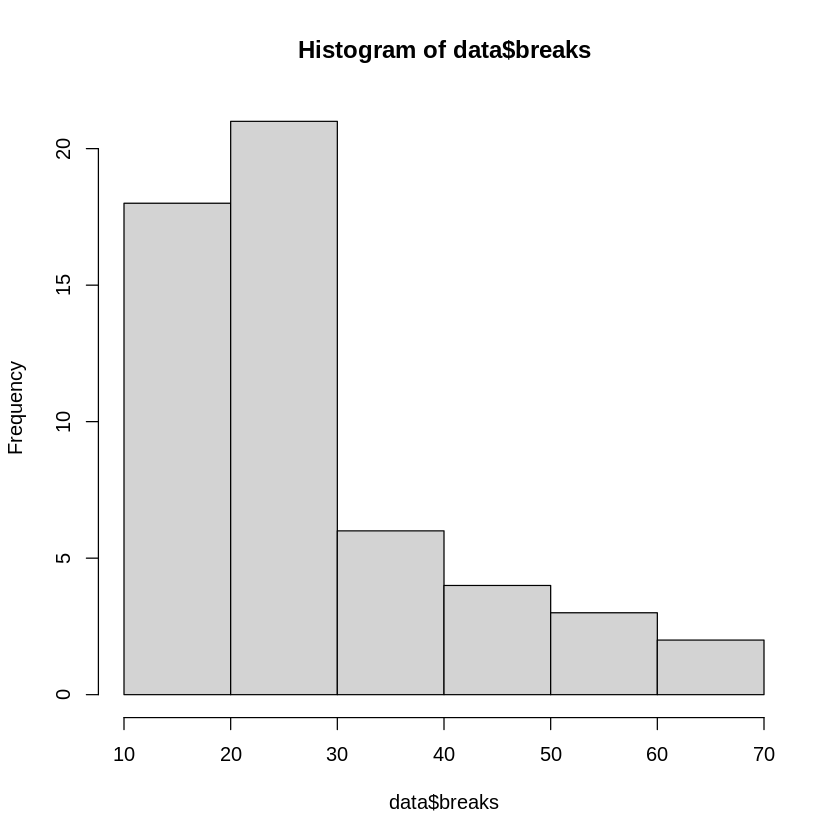

In [ ]:
hist(data$breaks)

As we can see that the distribution of our variable of interest is skewed in nature.

(This satisfies one of the assumption to use Poisson distribution.)

----
Let's check for another assumption which states that mean = variance = lamda:

In [ ]:
# calcualting mean and variance
mean(data$breaks)
var(data$breaks)

[1] 28.14815

[1] 174.2041

Here, we can see different values.
- Therefore, when the `Variance > mean` than it leads to `over-dispersion` in the model.
(Even if we use the Poisson regression it will lead to the over-dispersion of the model.)

In [ ]:
# modelling using Poisson regression
poisson_result = glm(breaks ~ wool + tension, data, family = poisson(link = "log"))
poisson_result


Call:  glm(formula = breaks ~ wool + tension, family = poisson(link = "log"), 
    data = data)

Coefficients:
(Intercept)        woolB     tensionM     tensionH  
     3.6920      -0.2060      -0.3213      -0.5185  

Degrees of Freedom: 53 Total (i.e. Null);  50 Residual
Null Deviance:	    297.4 
Residual Deviance: 210.4 	AIC: 493.1

In [ ]:
# for better insight
summary(poisson_result)


Call:
glm(formula = breaks ~ wool + tension, family = poisson(link = "log"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


As we know the Poisson model is a family of GLM, so the parameters are calculated using maximum likelihood estimation (MLE).

We can also see that R is treating categorical variables as the dummy variables by assigning the reference levels.

- As we look at the p-values are less than 0.05. Hence, both the explanatory variable (wool and tension) have significant effect on the breaks.

(The stars also shows the significance of the p-value.)

- We can also see that the over-dispersion exist as the residual deviance > degreed of freedom.

(The estimates are correct but the standard error are unaccounted by the model.)

- The Null deviance show that how well the response is predicted by the model.